/tmp/ipykernel_117/389789297.py:10: DtypeWarning: Columns (129,408,630,671,689,978,1001,1002,1006,1007,1008,1080,1113,1115,1116,1117,1118,1119,1120,1121,1124,1125,1126,1127,1128,1213,1214,1215,1216,1217,1218,1263,1266,1342,1343,1344,1345,1346,1347,1348,1349,1390,1391,1393,1439,1442,1463,1546,1549,1552,1555,1558,1561) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('CSCS_data_anon.csv',


Value Counts for 'LONELY_change_pre_covid':
LONELY_change_pre_covid
About the same          268
Somewhat more lonely    263
Much more lonely        207
Somewhat less lonely     47
NaN                      37
Much less lonely         28
Name: count, dtype: int64

Descriptive Statistics:
count    813.000000
mean       0.706027
std        1.019961
min       -2.000000
25%        0.000000
50%        1.000000
75%        2.000000
max        2.000000
Name: Loneliness_Change_Score, dtype: float64


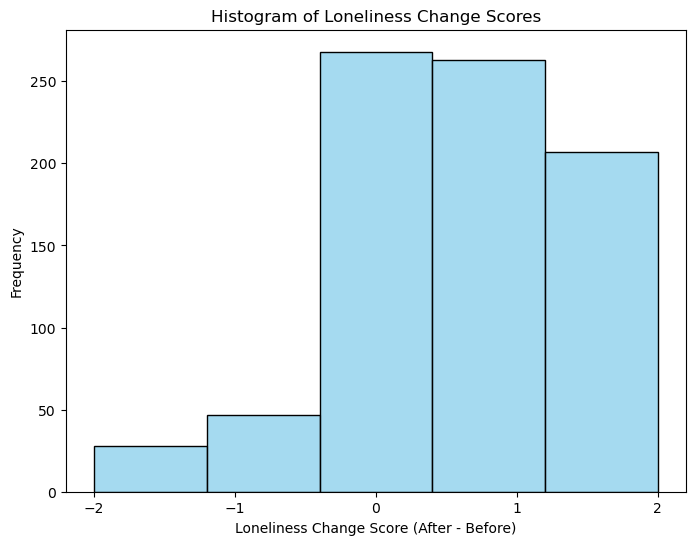

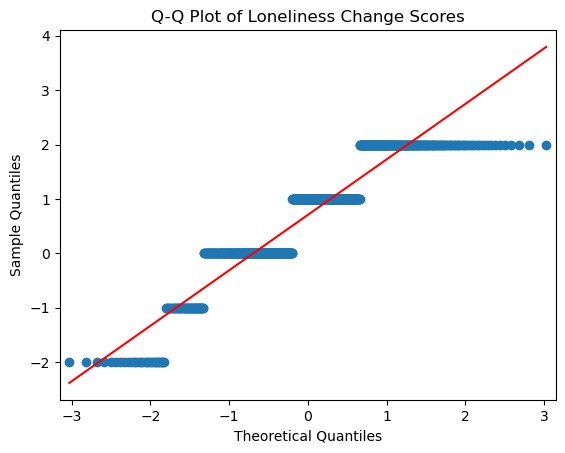


Shapiro-Wilk Test:
Statistic = 0.8753, p-value = 0.0000

One-Sample t-test:
T-statistic = 19.7371, p-value = 0.0000

Wilcoxon Signed-Rank Test:
Statistic = 129492.5, p-value = 0.0000

Conclusion from t-test: We reject the null hypothesis.
There is a statistically significant increase in loneliness after COVID-19.

Conclusion from Wilcoxon test: We reject the null hypothesis.
There is a statistically significant increase in loneliness after COVID-19.

Linear Regression Summary:
                               OLS Regression Results                              
Dep. Variable:     Loneliness_Change_Score   R-squared:                       0.079
Model:                                 OLS   Adj. R-squared:                  0.075
Method:                      Least Squares   F-statistic:                     22.25
Date:                     Mon, 02 Dec 2024   Prob (F-statistic):           7.83e-14
Time:                             23:13:08   Log-Likelihood:                -1095.9
No. Observati

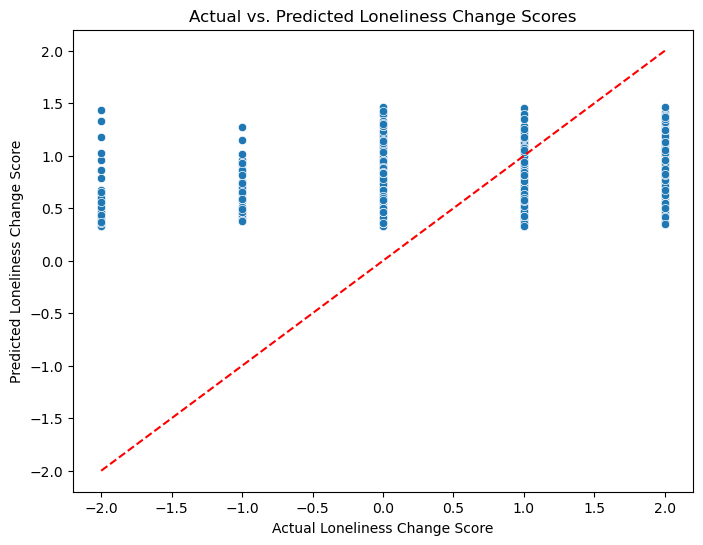

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm  # Already included for Q-Q plot

# Load the dataset
cols = pd.read_csv('var_names.csv')
data = pd.read_csv('CSCS_data_anon.csv',
                   na_values=["9999", "", " ", "Presented but no response", "NA"])

# Remove empty columns
empty = (data.isna().sum() == data.shape[0])
data = data[empty.index[~empty]]  # Keep non-empty columns only

# Keep recommended data
dataV2 = data[data.REMOVE_case == 'No'].copy()

# Select participants who are part of the cohort data
dataV2_cohort = dataV2[dataV2.SURVEY_cohort_participant == True].copy()

# Remove year 2023 data (if present and not needed)
dataV2_cohortV2 = dataV2_cohort[dataV2_cohort.SURVEY_collection_year != 2023].copy()

# Remove columns with a high number of missing values
missingness_limit = 100  # Adjust this limit as needed
columns2keep = dataV2_cohortV2.isna().sum() < missingness_limit
columns2keep = columns2keep.index[columns2keep]
dataV2_cohortV3 = dataV2_cohortV2[columns2keep].copy()

# Working with the variable 'LONELY_change_pre_covid'
# View the unique values
print("Value Counts for 'LONELY_change_pre_covid':")
print(dataV2_cohortV3['LONELY_change_pre_covid'].value_counts(dropna=False))

# Map the categorical responses to numerical scores
# We'll assign scores as follows:
# 'Much less lonely'       : -2
# 'Somewhat less lonely'   : -1
# 'About the same'         : 0
# 'Somewhat more lonely'   : 1
# 'Much more lonely'       : 2
# NaN values will be excluded from the analysis

# Create a mapping dictionary
loneliness_change_mapping = {
    'Much less lonely': -2,
    'Somewhat less lonely': -1,
    'About the same': 0,
    'Somewhat more lonely': 1,
    'Much more lonely': 2
}

# Apply the mapping
dataV2_cohortV3['Loneliness_Change_Score'] = dataV2_cohortV3['LONELY_change_pre_covid'].map(loneliness_change_mapping)

# Drop NaN values in the new score column
loneliness_change_scores = dataV2_cohortV3['Loneliness_Change_Score'].dropna()

# Descriptive statistics
print("\nDescriptive Statistics:")
print(loneliness_change_scores.describe())

# Visualization: Histogram of Change Scores
plt.figure(figsize=(8, 6))
sns.histplot(loneliness_change_scores, bins=5, kde=False, color='skyblue')
plt.title('Histogram of Loneliness Change Scores')
plt.xlabel('Loneliness Change Score (After - Before)')
plt.ylabel('Frequency')
plt.xticks([-2, -1, 0, 1, 2])
plt.show()

# Assess Normality with Q-Q Plot
sm.qqplot(loneliness_change_scores, line='s')
plt.title('Q-Q Plot of Loneliness Change Scores')
plt.show()

# Shapiro-Wilk Test for Normality
shapiro_stat, shapiro_p = stats.shapiro(loneliness_change_scores)
print('\nShapiro-Wilk Test:')
print(f'Statistic = {shapiro_stat:.4f}, p-value = {shapiro_p:.4f}')

# Since the data may not be normally distributed, consider both parametric and non-parametric tests

# One-Sample t-test (Parametric)
t_stat, p_value = stats.ttest_1samp(loneliness_change_scores, popmean=0, alternative='greater')

print('\nOne-Sample t-test:')
print(f'T-statistic = {t_stat:.4f}, p-value = {p_value:.4f}')

# Wilcoxon Signed-Rank Test (Non-Parametric)
wilcoxon_stat, wilcoxon_p = stats.wilcoxon(loneliness_change_scores - 0, alternative='greater')

print('\nWilcoxon Signed-Rank Test:')
print(f'Statistic = {wilcoxon_stat}, p-value = {wilcoxon_p:.4f}')

# Interpretation of results
alpha = 0.05
if p_value < alpha:
    print('\nConclusion from t-test: We reject the null hypothesis.')
    print('There is a statistically significant increase in loneliness after COVID-19.')
else:
    print('\nConclusion from t-test: We fail to reject the null hypothesis.')
    print('There is no statistically significant increase in loneliness after COVID-19.')

if wilcoxon_p < alpha:
    print('\nConclusion from Wilcoxon test: We reject the null hypothesis.')
    print('There is a statistically significant increase in loneliness after COVID-19.')
else:
    print('\nConclusion from Wilcoxon test: We fail to reject the null hypothesis.')
    print('There is no statistically significant increase in loneliness after COVID-19.')


# Select relevant predictors
predictors = [
              'PSYCH_zimet_multidimensional_social_support_scale_score',
              'WELLNESS_phq_score', 'WELLNESS_gad_score']

# Ensure these columns exist in your dataset
available_predictors = [col for col in predictors if col in dataV2_cohortV3.columns]

# Create a dataframe for regression
regression_data = dataV2_cohortV3[['Loneliness_Change_Score'] + available_predictors].dropna()

# Define dependent variable (Y) and independent variables (X)
Y = regression_data['Loneliness_Change_Score']
X = regression_data.drop('Loneliness_Change_Score', axis=1)

# Add a constant term to the predictors (for the intercept)
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(Y, X).fit()

# Print the regression summary
print("\nLinear Regression Summary:")
print(model.summary())

# Extract coefficients
coefficients = model.params
print("\nRegression Coefficients:")
print(coefficients)

# Extract p-values
p_values = model.pvalues
print("\nP-Values:")
print(p_values)

# Extract confidence intervals
conf_intervals = model.conf_int()
print("\nConfidence Intervals:")
print(conf_intervals)

# Plotting Actual vs. Predicted Loneliness Change Scores
predictions = model.predict(X)

plt.figure(figsize=(8,6))
sns.scatterplot(x=Y, y=predictions)
plt.xlabel('Actual Loneliness Change Score')
plt.ylabel('Predicted Loneliness Change Score')
plt.title('Actual vs. Predicted Loneliness Change Scores')
plt.plot([Y.min(), Y.max()], [Y.min(), Y.max()], color='red', linestyle='--')
plt.show()
